<a href="https://colab.research.google.com/github/swapnilkhartode/SPARK-FOUNDATION-GRIP-Internship/blob/README/Task__2__Prediction_Using_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spark Foundation (GRIP)- Data Science and Business Analytics (November-2021)**

**Name :- Swapnil Ramesh Khartode**

**Task 2:- Prediction Using Unsupervised Machine Learning**



In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(7) # See the first 7 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [ ]:

#data
x = iris_df.iloc[:,:].values

# **Predicting the value K for the model**

In [ ]:

# Finding the optimum number of clusters for k-means classification

k_range = range(1,11)
sse = [] # Sum of Squares of error(SSE), the cumlative of the distance of each point in a cluster from their respective centroid


for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sum_of_squares = km.inertia_
    sse.append(sum_of_squares)
    
print("Sum of Square Value from K = 1 to K = 11 are as followed: ")
sse

Sum of Square Value from K = 1 to K = 11 are as followed: 


[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.066035353535355,
 34.299712121212124,
 30.378860962566847,
 28.29719639184345,
 26.16674154011511]

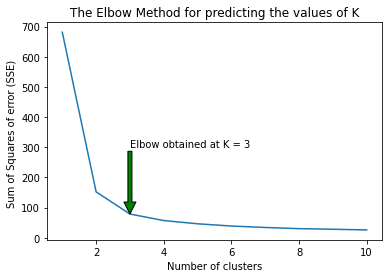

In [ ]:

# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.title('The Elbow Method for predicting the values of K')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares of error (SSE) ') # Within cluster sum of squares
plt.annotate("Elbow obtained at K = 3", xytext=(3,300),xy=(3,78.8514),arrowprops={'facecolor':'green'})
plt.plot(k_range,sse)
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

thus, value of K here is 3. So the optimum number of cluster for this model is 3.

### **Training the model for K = 3**

In [ ]:

# Applying kmeans to the dataset / Creating the kmeans classifier
Kmean = KMeans(n_clusters = 3)
ypredict = Kmean.fit_predict(iris_df)

In [ ]:

ypredict


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
iris_df["Cluster"]  = ypredict
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


## **Observing the clusters on sepal length and sepal width**

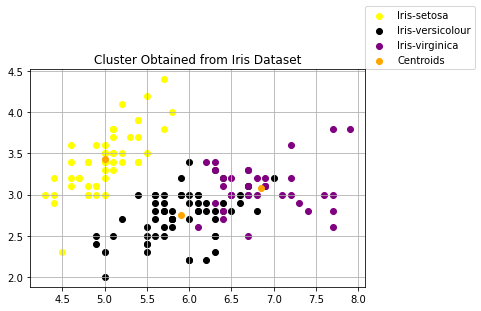

In [ ]:
y_Kmeans = Kmean.fit_predict(x)
# Visualising the clusters - On the first two columns
plt.title("Cluster Obtained from Iris Dataset")
plt.scatter(x[y_Kmeans == 0, 0], x[y_Kmeans == 0, 1], c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_Kmeans == 1, 0], x[y_Kmeans == 1, 1], c = 'black', label = 'Iris-versicolour')
plt.scatter(x[y_Kmeans == 2, 0], x[y_Kmeans == 2, 1], c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:,1], c = 'orange', label = 'Centroids')
plt.grid()
plt.legend(loc=(1,1))